In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 100

In [3]:
N = 10

In [4]:
def plot_empilement(G, H, D):
    hours_week = range(T)
    fig, ax = plt.subplots()
    ax.stackplot(hours_week,[G, H, D],labels=["G","H","D"],baseline="zero",alpha=0.7)
    fig.legend()

In [5]:
def plot_level(initial_level,capa, H, inflow,bornes):
    hours_week = range(T)
    fig, ax = plt.subplots()
    ax.plot(hours_week,H,label="H",alpha=0.7)
    ax.plot(hours_week,bornes[:,0],"--",color="tab:blue",alpha=0.7,label="p_min")
    ax.plot(hours_week,bornes[:,1],"-.",color="tab:blue",alpha=0.7,label="p_max")
    fig.legend()
    fig, ax2 = plt.subplots()
    level = np.concatenate([np.array([initial_level]),initial_level+np.cumsum(inflow-H)])
    ax2.plot(level,"tab:green",label="Level of stock")
    ax2.plot(np.zeros_like(level),"--",color="tab:green",label="level_min")
    ax2.plot(np.ones_like(level)*capa,"-.",color="tab:green",label="level_max")
    fig.legend()
    

In [6]:
empilement_random = [np.sort(np.random.randint(low=0,high=100,size=(T,3)),axis=1) for i in range(N)]

In [7]:
bornes_p = [np.sort(np.random.randint(low=0,high=50,size=(T,2)),axis=1) for i in range(N)]
for i in range(N):
    bornes_p[i][:,0] = np.minimum(bornes_p[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0])
    bornes_p[i][:,1] = np.maximum(bornes_p[i][:,1],empilement_random[i][:,1]-empilement_random[i][:,0])

In [8]:
inflow = [np.random.randint(low=0,high=50,size=(T)) for i in range(N)]

In [9]:
level_stock = [np.concatenate([np.array([0]),np.cumsum(inflow[i]-(empilement_random[i][:,1]-empilement_random[i][:,0]))]) for i in range(N)]
level_stock = [level_stock[i]-np.min(level_stock[i]) for i in range(N)]
capa_stock = [1.2*np.max(level_stock[i]) for i in range(N)]
level_stock = [level_stock[i]+0.1*capa_stock[i] for i in range(N)]

In [10]:
def orignal_algorithm(G, H, D, P):
    HE = np.zeros(T)
    DE = np.zeros(T)

    remix = []

    for i in range(T):
        if D[i]+H[i]>0:
            remix.append(True)
        else:
            remix.append(False)

    WH = sum(H)

    L = G+D+H

    bottom = np.min(G)
    top = np.max(L)

    ecart = 1.
    loop = 100
    
    while (abs(ecart) >0.01) and loop>0:
        niveau = (top + bottom) * 0.5
        stock = 0.

        for i in range(T):
            if remix[i]:
                if (niveau > L[i]):
                    HEi = H[i] + D[i]
                    if (HEi > P[i]):
                        HEi = P[i]
                        DE[i] = H[i] + D[i] - HEi
                    else :
                        DE[i] = 0
                else :
                    if (G[i] > niveau):
                        HEi = 0
                        DE[i] = H[i] + D[i]
                    else:
                        HEi = niveau - G[i]
                        if (HEi > P[i]):
                            HEi = P[i]
                        DE[i] = H[i] + D[i] - HEi
                stock += HEi
                HE[i] = HEi
            else :
                HE[i] = 0
                DE[i] = 0

        ecart = WH - stock
        if (ecart > 0.):
            bottom = niveau
        else:
            top = niveau

        loop -= 1
    print(loop, ecart, bottom, top)

    return HE, DE

In [11]:
remix_hydro_original = [orignal_algorithm(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1]) for i in range(N)]

82 -0.00640869140625 53.874755859375 53.8751335144043
82 -0.004032135009765625 52.12696838378906 52.12734603881836
82 -0.00395965576171875 59.73554992675781 59.735923767089844
82 0.009059906005859375 49.69826889038086 49.698646545410156
85 0.007965087890625 52.626983642578125 52.6300048828125
82 0.00106048583984375 55.2399787902832 55.2403564453125
82 -0.000637054443359375 55.73432922363281 55.73470687866211
82 -0.005031585693359375 56.957176208496094 56.95755386352539
83 -0.00614166259765625 57.14222717285156 57.142982482910156
82 0.0044403076171875 53.365299224853516 53.36567687988281


In [12]:
def simplified_algorithm(G, H, D, P_max):
    HE = np.zeros(T)
    DE = np.zeros(T)

    remix = []

    for i in range(T):
        if D[i]+H[i]>0:
            remix.append(True)
        else:
            remix.append(False)

    WH = sum(H)

    L = G+D+H

    bottom = np.min(G)
    top = np.max(L)

    ecart = 1.
    loop = 100
    
    while (abs(ecart) >0.01) and loop>0:
        niveau = (top + bottom) * 0.5
        stock = 0.

        for i in range(T):
            if remix[i]:
                if (niveau > L[i]):
                    HEi = H[i] + D[i]
                else :
                    if (G[i] > niveau):
                        HEi = 0
                    else:
                        HEi = niveau - G[i]
                
                HEi = min(HEi, P_max[i])
                stock += HEi
                HE[i] = HEi
                DE[i] = H[i] + D[i] - HEi
            else :
                HE[i] = 0
                DE[i] = 0

        ecart = WH - stock
        if (ecart > 0.):
            bottom = niveau
        else:
            top = niveau

        loop -= 1
    print(loop, ecart, bottom, top)

    return HE, DE

In [13]:
remix_hydro_simplified = [simplified_algorithm(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1]) for i in range(N)]

82 -0.00640869140625 53.874755859375 53.8751335144043
82 -0.004032135009765625 52.12696838378906 52.12734603881836
82 -0.00395965576171875 59.73554992675781 59.735923767089844
82 0.009059906005859375 49.69826889038086 49.698646545410156
85 0.007965087890625 52.626983642578125 52.6300048828125
82 0.00106048583984375 55.2399787902832 55.2403564453125
82 -0.000637054443359375 55.73432922363281 55.73470687866211
82 -0.005031585693359375 56.957176208496094 56.95755386352539
83 -0.00614166259765625 57.14222717285156 57.142982482910156
82 0.0044403076171875 53.365299224853516 53.36567687988281


In [14]:
for i in range(N):
    for j in range(2):
        assert np.all(remix_hydro_original[i][j]==remix_hydro_simplified[i][j])

In [15]:
def simplified_algorithm_with_p_min(G, H, D, P_max,P_min):
    HE = np.zeros(T)
    DE = np.zeros(T)

    remix = []

    for i in range(T):
        if D[i]+H[i]>0:
            remix.append(True)
        else:
            remix.append(False)

    WH = sum(H)

    L = G+D+H

    bottom = np.min(G)
    top = np.max(L)

    ecart = 1.
    loop = 100
    
    while (abs(ecart) >0.01) and loop>0:
        niveau = (top + bottom) * 0.5
        stock = 0.

        for i in range(T):
            if remix[i]:
                if (niveau > L[i]):
                    HEi = H[i] + D[i]
                else :
                    if (G[i] > niveau):
                        HEi = 0
                    else:
                        HEi = niveau - G[i]
                
                HEi = max(P_min[i],min(HEi, P_max[i]))
                stock += HEi
                HE[i] = HEi
                DE[i] = H[i] + D[i] - HEi
            else :
                HE[i] = 0
                DE[i] = 0

        ecart = WH - stock
        if (ecart > 0.):
            bottom = niveau
        else:
            top = niveau

        loop -= 1
    print(loop, ecart, bottom, top)

    return HE, DE

In [16]:
remix_hydro_with_p_min= [simplified_algorithm_with_p_min(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0]) for i in range(N)]

83 0.00678253173828125 47.209144592285156 47.20989990234375
83 -0.0008087158203125 48.95164489746094 48.95240020751953
82 -0.00262451171875 56.94969177246094 56.95006561279297
86 0.00091552734375 45.34881591796875 45.3548583984375
83 0.0045166015625 50.54157257080078 50.542327880859375
83 -0.0079193115234375 51.91246032714844 51.91321563720703
83 0.009674072265625 51.694175720214844 51.69493103027344
83 -0.00579833984375 54.2493896484375 54.250144958496094
82 0.005641937255859375 54.4665412902832 54.4669189453125
85 -0.007110595703125 49.1253662109375 49.128387451171875


In [17]:
def simplified_algorithm_with_p_min_and_capa(G, H, D, P_max,P_min, initial_level, capa, inflow):
    HE = np.zeros(T)
    DE = np.zeros(T)

    remix = []

    for i in range(T):
        if D[i]+H[i]>0:
            remix.append(True)
        else:
            remix.append(False)

    WH = sum(H)

    L = G+D+H

    bottom = np.min(G)
    top = np.max(L)

    ecart = 1.
    loop = 1000
    
    while (abs(ecart) >0.01) and loop>0:
        niveau = (top + bottom) * 0.5
        stock = 0.
        level = initial_level

        for i in range(T):
            if remix[i]:
                if (niveau > L[i]):
                    HEi = (H[i] + D[i])*0.5
                else :
                    if (G[i] > niveau):
                        HEi = 0
                    else:
                        HEi = (niveau - G[i])*0.5
                
                
                if HEi < level + inflow[i] - capa and level + inflow[i] - capa <= P_max[i]:
                    HEi = level + inflow[i] - capa
                else :
                    HEi = HE[i]
                if HEi > level + inflow[i] and level + inflow[i]>= P_min[i]:
                    HEi = level + inflow[i]
                else :
                    HEi = HE[i]
                assert HEi >= P_min[i]
                assert HEi <= P_max[i]
                stock += HEi
                HE[i] = HEi
                DE[i] = H[i] + D[i] - HEi
            else :
                HE[i] = 0
                DE[i] = 0
            level = level + inflow[i] - HE[i]
            assert level >= 0
            assert level <= capa

        ecart = WH - stock
        if (ecart > 0.):
            bottom = niveau
        else:
            top = niveau

        loop -= 1
    print(loop, ecart, bottom, top)
    if loop == 0:
        return H, D

    return HE, DE

In [18]:
remix_hydro_with_p_min_and_capa = [simplified_algorithm_with_p_min_and_capa(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

AssertionError: 

In [21]:
def new_heuristic(G, H, D, P_max,P_min, initial_level, capa, inflow):
    new_H = np.array(H,copy=True,dtype=np.float32)
    new_D = np.array(D,copy=True,dtype=np.float32)

    loop = 1000

    top = max(G+H+D+1)
   
    while loop>0:
        G_plus_H = G + new_H

        idx_pic = np.argmax(np.where(new_H>0,G_plus_H,0))
        idx_creux = np.argmin(np.where((new_D>0)*(new_H<P_max),G_plus_H,top))

        if abs(G_plus_H[idx_pic]-G_plus_H[idx_creux])<=1e-2:
            break

        max_pic = new_H[idx_pic]
        max_creux = min(P_max[idx_creux]-new_H[idx_creux],new_D[idx_creux])

        dif_pic_creux = G_plus_H[idx_pic]-G_plus_H[idx_creux]

        delta = min(max_pic,max_creux,dif_pic_creux/2)

        new_H[idx_pic] = new_H[idx_pic]-delta
        new_H[idx_creux] = new_H[idx_creux]+delta
        new_D[idx_pic] = H[idx_pic]+D[idx_pic]-new_H[idx_pic]
        new_D[idx_creux] = H[idx_creux]+D[idx_creux]-new_H[idx_creux]
        
        loop -= 1
    print(loop)
    return new_H, new_D

In [22]:
new_heur = [new_heuristic(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

888
868
865
821
869
868
874
855
853
842


In [23]:
for i in range(N):
    for j in range(2):
        assert np.all(np.abs(remix_hydro_original[i][j]-new_heur[i][j])<=0.01)

In [24]:
def new_heuristic_with_p_min(G, H, D, P_max,P_min, initial_level, capa, inflow):
    new_H = np.array(H,copy=True,dtype=np.float32)
    new_D = np.array(D,copy=True,dtype=np.float32)

    loop = 1000

    top = max(G+H+D+1)
   
    while loop>0:
        G_plus_H = G + new_H

        idx_pic = np.argmax(np.where((new_H>P_min),G_plus_H,0))
        idx_creux = np.argmin(np.where((new_D>0)*(new_H<P_max),G_plus_H,top))

        if abs(G_plus_H[idx_pic]-G_plus_H[idx_creux])<=1e-2:
            break

        max_pic = new_H[idx_pic]-P_min[idx_pic]
        max_creux = min(P_max[idx_creux]-new_H[idx_creux],new_D[idx_creux])

        dif_pic_creux = G_plus_H[idx_pic]-G_plus_H[idx_creux]

        delta = min(max_pic,max_creux,dif_pic_creux/2)

        new_H[idx_pic] = new_H[idx_pic]-delta
        new_H[idx_creux] = new_H[idx_creux]+delta
        new_D[idx_pic] = H[idx_pic]+D[idx_pic]-new_H[idx_pic]
        new_D[idx_creux] = H[idx_creux]+D[idx_creux]-new_H[idx_creux]
        
        loop -= 1
    print(loop)
    return new_H, new_D

In [25]:
new_heur_with_p_min = [new_heuristic_with_p_min(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

862
883
873
862
856
840
886
910
883
891


In [26]:
for i in range(N):
    for j in range(2):
        assert np.all(np.abs(remix_hydro_with_p_min[i][j]-new_heur_with_p_min[i][j])<=0.01)

In [31]:
def new_heuristic_with_p_min_and_capa(G, H, D, P_max,P_min, initial_level, capa, inflow):
    new_H = np.array(H,copy=True,dtype=np.float32)
    new_D = np.array(D,copy=True,dtype=np.float32)

    loop = 1000

    top = max(G+H+D+1)
   
    while (loop>0):

        G_plus_H = G + new_H

        level = initial_level + np.cumsum(inflow-new_H)
        possible_pic = np.argwhere((new_H>P_min)*(level<capa))[:,0]
        idx_pic = np.random.choice(possible_pic,p=G_plus_H[possible_pic]/sum(G_plus_H[possible_pic]))
        possible_creux = np.argwhere((new_D>0)*(new_H<P_max)*(level>0)*(G_plus_H<=G_plus_H[idx_pic]))[:,0]
        if len(possible_creux)!= 0:
            
            idx_creux = np.random.choice(possible_creux,p=(top-G_plus_H[possible_creux])/sum((top-G_plus_H[possible_creux])))

            if idx_creux<idx_pic:
                intermediate_level = level[idx_creux:idx_pic+1]
            else : 
                intermediate_level = level[idx_pic:idx_creux+1]


            max_pic = min(new_H[idx_pic]-P_min[idx_pic],capa-max(intermediate_level))
            max_creux = min(P_max[idx_creux]-new_H[idx_creux],new_D[idx_creux],min(intermediate_level))

            dif_pic_creux = max(G_plus_H[idx_pic]-G_plus_H[idx_creux],0)

            delta = min(max_pic,max_creux,dif_pic_creux/2)

            new_H[idx_pic] = new_H[idx_pic]-delta
            new_H[idx_creux] = new_H[idx_creux]+delta
            new_D[idx_pic] = H[idx_pic]+D[idx_pic]-new_H[idx_pic]
            new_D[idx_creux] = H[idx_creux]+D[idx_creux]-new_H[idx_creux]
            
            
        loop -= 1

        idx_pic = np.argmax(np.where((new_H>P_min)*(level<capa),G_plus_H,0))
        idx_creux = np.argmin(np.where((new_D>0)*(new_H<P_max)*(level>0),G_plus_H,top))

        if abs(G_plus_H[idx_pic]-G_plus_H[idx_creux])<=1e-2:
            break

    print(loop)
    return new_H, new_D

In [32]:
new_heur_with_p_min_and_capa = [new_heuristic_with_p_min_and_capa(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

0
0
0
0
0
0
0
0
0
0


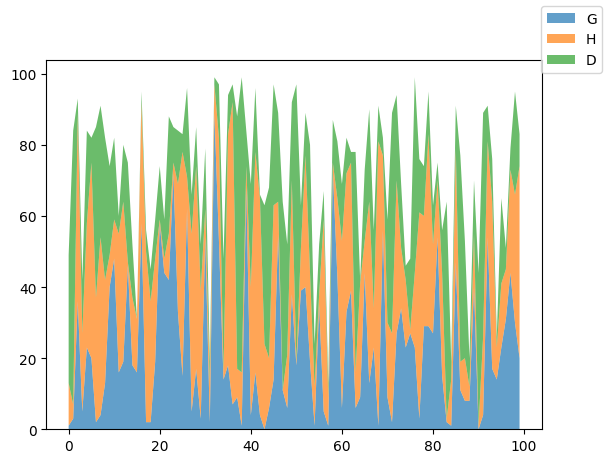

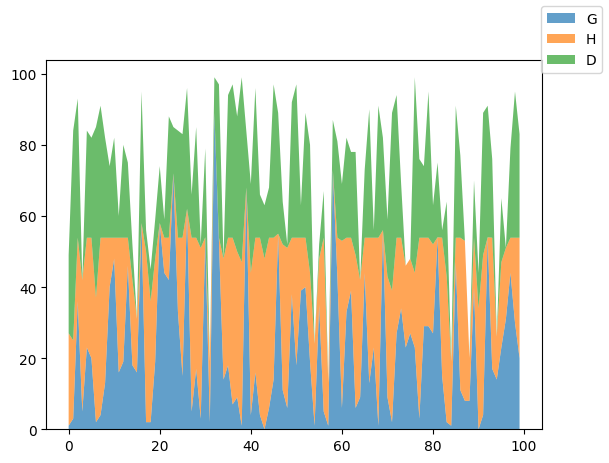

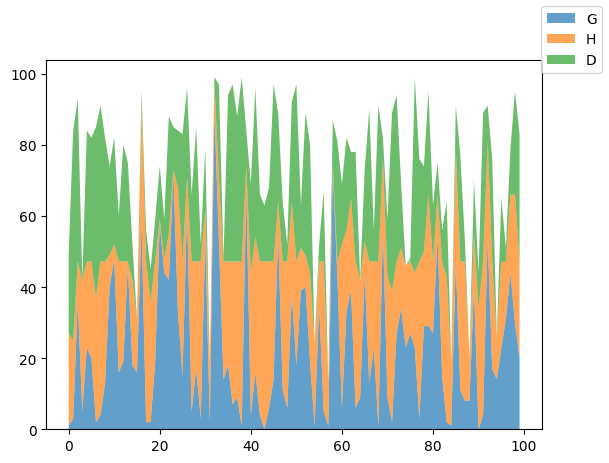

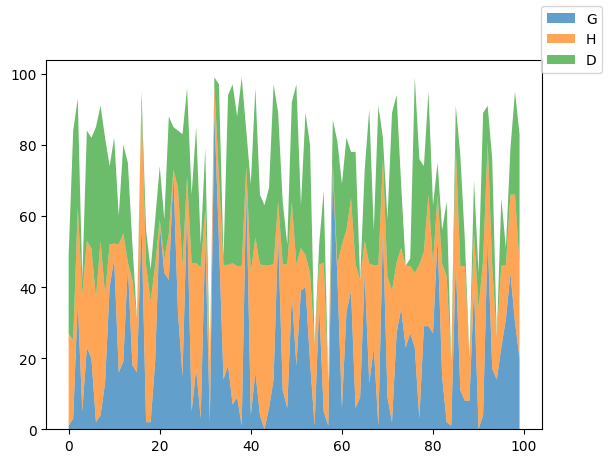

In [33]:
i = 0
plot_empilement(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1])
plot_empilement(empilement_random[i][:,0],remix_hydro_original[i][0],remix_hydro_original[i][1])
plot_empilement(empilement_random[i][:,0],remix_hydro_with_p_min[i][0],remix_hydro_with_p_min[i][1])
plot_empilement(empilement_random[i][:,0],new_heur_with_p_min_and_capa[i][0],new_heur_with_p_min_and_capa[i][1])

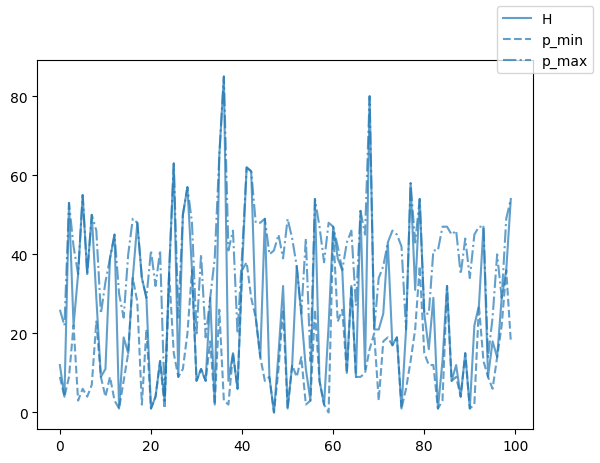

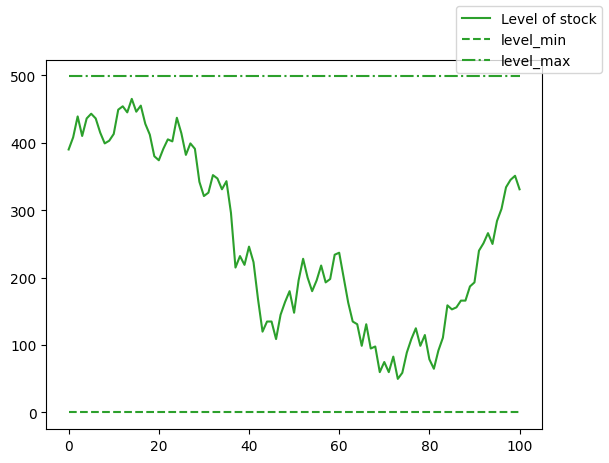

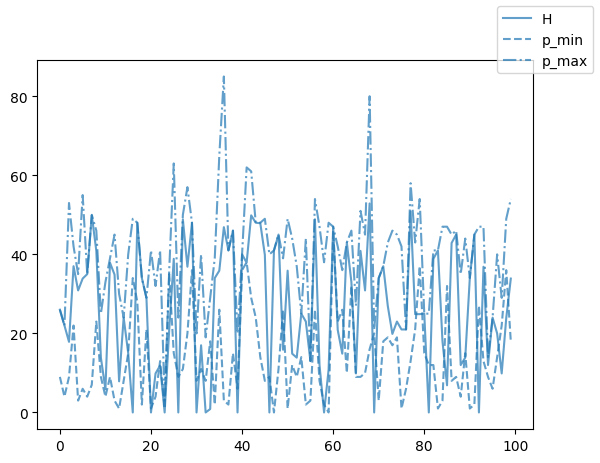

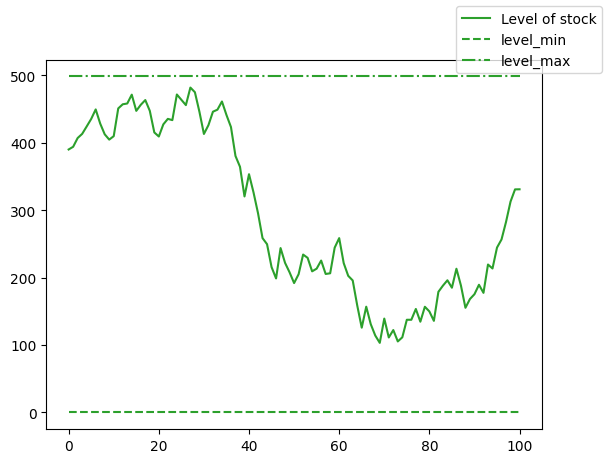

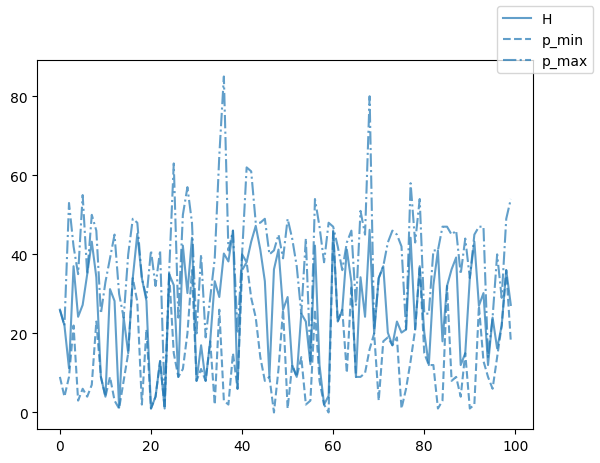

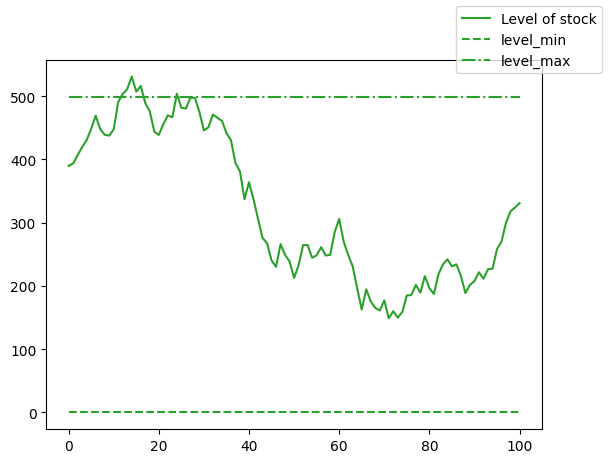

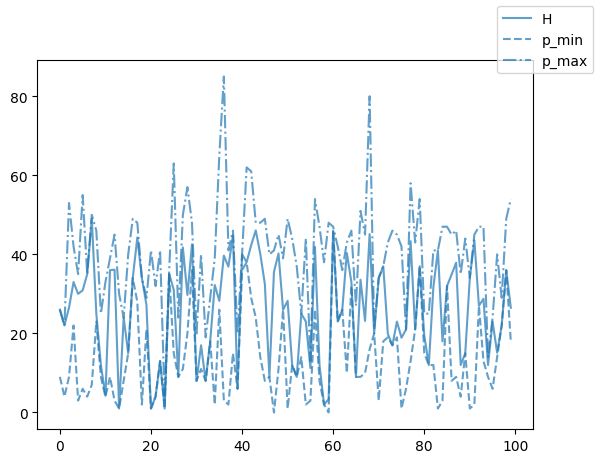

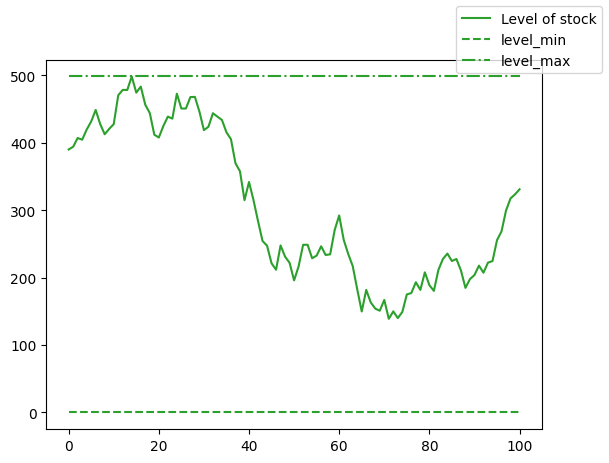

In [34]:
plot_level(level_stock[i][0],capa_stock[i],empilement_random[i][:,1]-empilement_random[i][:,0],inflow[i],bornes_p[i])
plot_level(level_stock[i][0],capa_stock[i],remix_hydro_original[i][0],inflow[i],bornes_p[i])
plot_level(level_stock[i][0],capa_stock[i],remix_hydro_with_p_min[i][0],inflow[i],bornes_p[i])
plot_level(level_stock[i][0],capa_stock[i],new_heur_with_p_min_and_capa[i][0],inflow[i],bornes_p[i])

In [37]:
import xpress as xp
xp.controls.outputlog = 1
xp.controls.miprelstop = 1e-10

In [66]:
def optimization_problem(G, H, D, P_max,P_min, initial_level, capa, inflow):
    p = xp.problem()

    HE = [xp.var(lb=0,ub=P_max[i]) for i in range(T)]
    DE = [xp.var(lb=0) for i in range(T)]
    max_G_plus_H = xp.var()
    min_G_plus_H = xp.var()

    obj = xp.var()



    p.addVariable(HE, DE,max_G_plus_H,min_G_plus_H,obj)

    p.addConstraint(obj == xp.Sum((G+HE-xp.Sum(G+HE)/T)**2))

    p.addConstraint(HE[i]+DE[i]==H[i]+D[i] for i in range(T))
    p.addConstraint(xp.Sum(HE)==sum(H))

    # for i in range(T):
    #     p.addIndicator(HE[i]>=1e-2,G[i]+HE[i] <= max_G_plus_H )
    #     p.addIndicator((DE[i]>=1e-2) and (HE[i]<=P_max[i]-1e-2),G[i]+HE[i] >= min_G_plus_H)

    p.setObjective(obj)

    p.nlpoptimize()

    assert p.getProbStatus()==1

    return p.getSolution(HE, DE)

In [67]:
optim = [optimization_problem(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

Original problem size
   linear:    102 rows, 204 columns, 401 linear coefficients
   quadratic: 0 in obj, 1 rows, 5050 in rows
Nonlinear presolve
   converted 1 quadratic matrix to SLP
   singleton column removal removed 0 rows, 100 columns, 100 linear coefficients
   dual cost reductions removed 0 rows, 2 columns, 0 linear coefficients
   bound tightening reduced 31 bounds
   creating 1 '+' clusters removed 5047 tokens
   created 5051 '*' clusters
Presolved problem size
   linear:    102 rows, 102 columns, 301 linear coefficients
   nonlinear: 1 coefficients, 25252 tokens
Problem is nonlinear presolved
FICO Xpress v8.14.8, Hyper, solve started 19:17:48, Nov 14, 2024
Control settings used:
XSLP_POSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
OUTPUTLOG = 1
MIPRELSTOP = 1.e-10
Maximum expanded nl-formula size: 25252  (row 'R6832')
Total tokens: 25252
  8  parallel calculation threads
  Jacobian: automatic differentiation
Initial point objective:     1.0000
Absolute / relative validation:        

SolverError: Xpress-NLP has not been licensed for use here

In [42]:
for i in range(N):
    for j in range(2):
        assert np.all(remix_hydro_original[i][j]==optim[i][j])

AssertionError: 

In [43]:
print(i, j)
print(remix_hydro_original[i][j])
print(optim[i][j])

0 0
[26.         22.         17.87513351 37.         30.87513351 33.87513351
 35.         49.87513351 40.87513351 13.87513351  5.87513351 37.87513351
 34.87513351  7.87513351 24.         15.          0.         48.
 34.         29.          0.          9.87513351 11.87513351  0.
 20.87513351 38.87513351  0.         48.87513351 36.87513351 48.
  0.         17.          0.          0.87513351 34.         35.87513351
 46.87513351 41.         46.          0.         40.         37.87513351
 49.87513351 48.         47.87513351 39.87513351  0.         41.
 45.         15.87513351 35.87513351 14.87513351 13.87513351 25.
 23.         13.         48.87513351 12.          0.         10.87513351
 47.         20.87513351 14.87513351 43.         33.          9.87513351
 40.87513351 30.87513351 52.87513351  0.         34.         37.
 26.87513351 19.87513351 23.         21.         21.         50.87513351
 24.87513351 24.87513351 25.          0.         38.87513351 41.
 18.          6.87513351 42.87

In [48]:
print(max(empilement_random[i][:,0]))
print(max(empilement_random[i][:,0]+optim[i][0]))

89
89.0


In [55]:
idx_max = np.argmax(empilement_random[i][:,0])
print(empilement_random[i][idx_max,0])
print(optim[i][0][idx_max])
idx_min = np.argmin(empilement_random[i][:,2])
print(empilement_random[i][idx_min,2])
print(optim[i][1][idx_min])

89
0.0
13
0.0


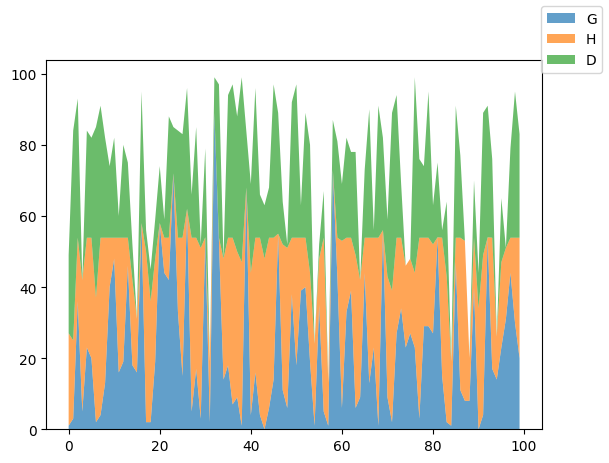

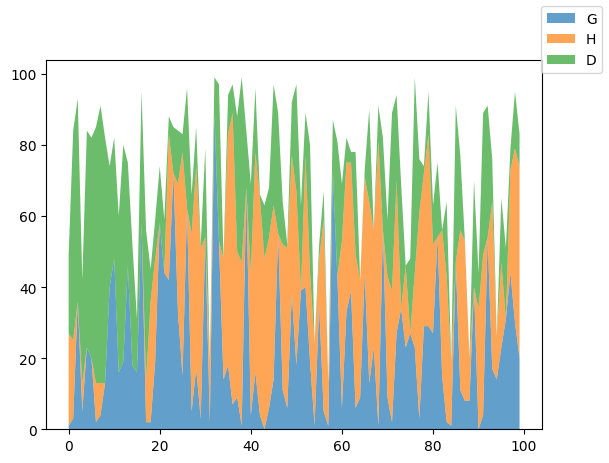

In [44]:
plot_empilement(empilement_random[i][:,0],remix_hydro_original[i][0],remix_hydro_original[i][1])
plot_empilement(empilement_random[i][:,0],optim[i][0],optim[i][1])